In [1]:
# usual packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict

# machine learning packages
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

%matplotlib inline

Using TensorFlow backend.


In [2]:
cosmos = pd.read_csv('match_COSMOS_99_with_err.csv')
cosmos=cosmos.loc[:,["B_MAG_APER2","H_MAG_APER2","Hw_MAG_APER2","IA484_MAG_APER2","IA527_MAG_APER2","IA624_MAG_APER2",
            "IA679_MAG_APER2","IA738_MAG_APER2","IA767_MAG_APER2","IB427_MAG_APER2","IB464_MAG_APER2","IB505_MAG_APER2",
            "IB574_MAG_APER2","IB709_MAG_APER2","IB827_MAG_APER2","J_MAG_APER2","Ks_MAG_APER2","Ksw_MAG_APER2",
            "NB711_MAG_APER2","NB816_MAG_APER2","SPLASH_1_MAG","SPLASH_2_MAG","SPLASH_3_MAG","SPLASH_4_MAG","V_MAG_APER2",
            "Y_MAG_APER2","ip_MAG_APER2","r_MAG_APER2","yHSC_MAG_APER2","zpp_MAG_APER2",'zspec']]

In [3]:
df_new=cosmos.copy()
df_new=df_new[(df_new["IA767_MAG_APER2"]<=22.5) & ( df_new["IA767_MAG_APER2"]>=18)]
df_new=df_new[(df_new['zspec']>0)&(df_new['zspec']<1.5)]

df_new.iloc[0] = df_new.iloc[0].replace({-99.9:None})
df_new.iloc[0] = df_new.iloc[0].replace({None:np.mean(df_new.iloc[0])})


def preprocess(df, zspec_drop=True, magnitude_drop=True):
    
    df_new=df.copy()
    print(df_new.shape)
    
    if (magnitude_drop==True):
        df_new=df_new[(df_new["IA767_MAG_APER2"]<=22.5) & ( df_new["IA767_MAG_APER2"]>=18)]
    if (zspec_drop == True):
        df_new=df_new[(df_new['zspec']>0)&(df_new['zspec']<1.5)]
    
    print(df_new.shape)
 
    for i in range(len(df_new)):        
        df_new.iloc[i] = df_new.iloc[i].replace({-99.9:None})
        df_new.iloc[i] = df_new.iloc[i].replace({None:np.mean(df_new.iloc[i])})
        
    return df_new.iloc[:,:-1] , df_new.iloc[:,-1]

photo_bands,zspec=preprocess(cosmos)
print(zspec)
stdScaler= StandardScaler()
stdScaler.fit(photo_bands)
photo_bands=stdScaler.transform(photo_bands)

(391103, 31)
(12243, 31)
45        0.0994
60        0.5181
71        0.3695
106       0.0993
369       0.6774
           ...  
391052    0.9268
391053    0.6978
391058    0.3444
391075    0.4070
391079    0.5340
Name: zspec, Length: 12243, dtype: float64


In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(photo_bands, zspec, test_size=0.2)

In [5]:
#nHiddenUnits = [300, 500, 800]
nHiddenUnits = [(300,), (300,300), (300,300,300), (300,300,300,300), (300,300,300,300,300)]
parameters_nn = {'hidden_layer_sizes': nHiddenUnits}
#nn = MLPRegressor(activation = 'relu', alpha = 100, max_iter=1400, solver = 'adam').fit(X_train, Y_train)
nn = MLPRegressor(activation = 'relu', max_iter=4000, solver = 'adam', random_state = 0)
print(dict)
z_pres=defaultdict(dict)
print(z_pres)


<class 'dict'>
defaultdict(<class 'dict'>, {})


In [6]:
#nn = MLPRegressor(hidden_layer_sizes = (500), activation = 'relu', max_iter=1400, solver = 'adam', random_state = 0)
#nn.fit(X_train,Y_train)
#print(nn.score(X_test,Y_test))

0.8477357885443896
0.8477357885443896


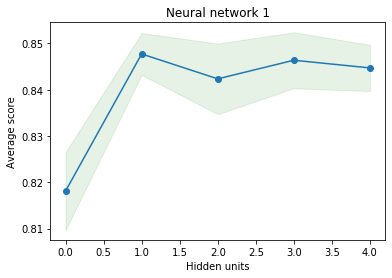

In [7]:
from sklearn.model_selection import GridSearchCV
gd_srf=GridSearchCV(nn, parameters_nn,cv=3)
gd_srf.fit(X_train,Y_train)
#z_pres[name]=gd_srf.predict(X_test)
print(gd_srf.best_score_)

scores_nn = gd_srf.cv_results_['mean_test_score']
print(gd_srf.best_score_)
scores_std_nn = gd_srf.cv_results_['std_test_score']

x_label =np.arange(len(nHiddenUnits))
plt.fill_between(x_label, scores_nn - scores_std_nn,
                 scores_nn + scores_std_nn, alpha=0.1, color="g")
plt.plot(x_label, scores_nn, 'o-')
#plt.xscale('log')
plt.xlabel('Hidden units')
plt.ylabel('Average score')
plt.title('Neural network 1');